# ML APPROACH 

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

#  Loading Dataset

In [2]:
data=pd.read_csv("D:\project 2021-2023\creditcard.csv")

# EDA

In [3]:
data.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,4272,3756,1.328287,-0.579219,0.622191,-0.477965,-1.062418,-0.570816,-0.834580,-0.022299,...,-0.230903,-0.650906,0.185311,-0.057384,0.055986,-0.485516,-0.017464,0.011740,27.91,0
1,4273,3756,1.380025,-0.719074,-0.927477,-1.607368,1.447385,3.278719,-1.155732,0.707490,...,-0.271422,-0.904084,0.071516,0.920587,0.352977,-0.509559,-0.022016,0.017362,53.00,0
2,4274,3756,1.245933,-0.940653,-1.005307,-1.550986,1.378930,3.303698,-1.063627,0.689475,...,-0.229364,-0.940718,0.010338,0.924149,0.327491,-0.516961,-0.035130,0.029448,122.41,0
3,4275,3756,-0.209595,-0.546688,1.352906,-1.261824,0.435325,0.571316,-1.447447,-0.499340,...,0.748047,-0.513380,-1.081378,-0.659909,-0.115635,-0.534156,0.232919,0.259636,116.03,0
4,4276,3756,1.455736,-0.593967,-0.883533,-1.639203,1.486036,3.264616,-1.207737,0.717662,...,-0.295169,-0.883400,0.106058,0.918577,0.367366,-0.505379,-0.014611,0.010539,13.81,0


In [4]:
data.tail()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5094,46919,42988,-4.423508,1.648048,-6.934388,4.894601,-5.078131,0.010849,-3.409096,1.409291,...,0.698359,0.487478,1.228698,-0.535217,0.388278,-0.009466,2.300164,0.081231,648.00,1
5095,46999,43028,-1.109646,0.811069,-1.138135,0.935265,-2.330248,-0.116106,-1.621986,0.458028,...,0.641594,0.841755,0.176728,0.081004,-0.258899,0.707654,0.418649,0.080756,204.27,1
5096,47668,43300,1.303216,1.224334,-2.198091,1.267753,1.715625,-0.557679,0.676696,-0.165207,...,-0.273487,-0.638989,-0.353315,-1.650017,0.975470,-0.178116,0.055378,0.079611,1.00,1
5097,47670,43302,1.103974,-0.016781,0.771843,1.213550,-0.541776,0.083116,-0.350386,0.293099,...,-0.200222,-0.469612,0.109422,0.154738,0.310512,-0.538615,0.043073,0.011748,1.00,1
5098,50212,44393,-4.617461,3.663395,-5.297446,3.880960,-3.263551,-0.918547,-5.715262,0.831040,...,2.698175,-0.027081,0.366775,-0.123011,-0.300457,-0.239996,-0.183463,-0.073360,1.00,1


In [5]:
#checking the shape
data.shape

(5099, 32)

In [6]:
#checking the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5099 non-null   int64  
 1   Time        5099 non-null   int64  
 2   V1          5099 non-null   float64
 3   V2          5099 non-null   float64
 4   V3          5099 non-null   float64
 5   V4          5099 non-null   float64
 6   V5          5099 non-null   float64
 7   V6          5099 non-null   float64
 8   V7          5099 non-null   float64
 9   V8          5099 non-null   float64
 10  V9          5099 non-null   float64
 11  V10         5099 non-null   float64
 12  V11         5099 non-null   float64
 13  V12         5099 non-null   float64
 14  V13         5099 non-null   float64
 15  V14         5099 non-null   float64
 16  V15         5099 non-null   float64
 17  V16         5099 non-null   float64
 18  V17         5099 non-null   float64
 19  V18         5099 non-null  

In [7]:
#checking for null values
data.isnull().sum()

Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64

In [8]:
#checking distribution of numerical values 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5099.0,9124.381840,6852.296511,4272.000000,5608.500000,9888.000000,11162.500000,388180.000000
Time,5099.0,13332.315944,7058.445003,3756.000000,5770.000000,14573.000000,19329.000000,44393.000000
V1,5099.0,-0.264959,2.271878,-30.552380,-0.923625,-0.118651,1.174643,1.575499
V2,5099.0,0.372932,1.550890,-11.798559,-0.336785,0.214142,0.928512,16.713389
V3,5099.0,0.685604,2.451820,-31.103685,0.423041,0.976744,1.668664,4.079168
V4,5099.0,0.490995,1.678320,-4.464895,-0.566038,0.271991,1.361798,11.927512
V5,5099.0,-0.265088,1.668634,-22.105532,-0.813208,-0.259382,0.324743,8.869680
V6,5099.0,0.200843,1.362315,-6.008567,-0.548992,-0.087944,0.597392,10.033923
V7,5099.0,-0.424327,1.813200,-21.922811,-0.742673,-0.274844,0.281868,8.571717
V8,5099.0,0.114316,1.507027,-23.464595,-0.153002,0.045546,0.303989,20.007208


#  Data Visualization

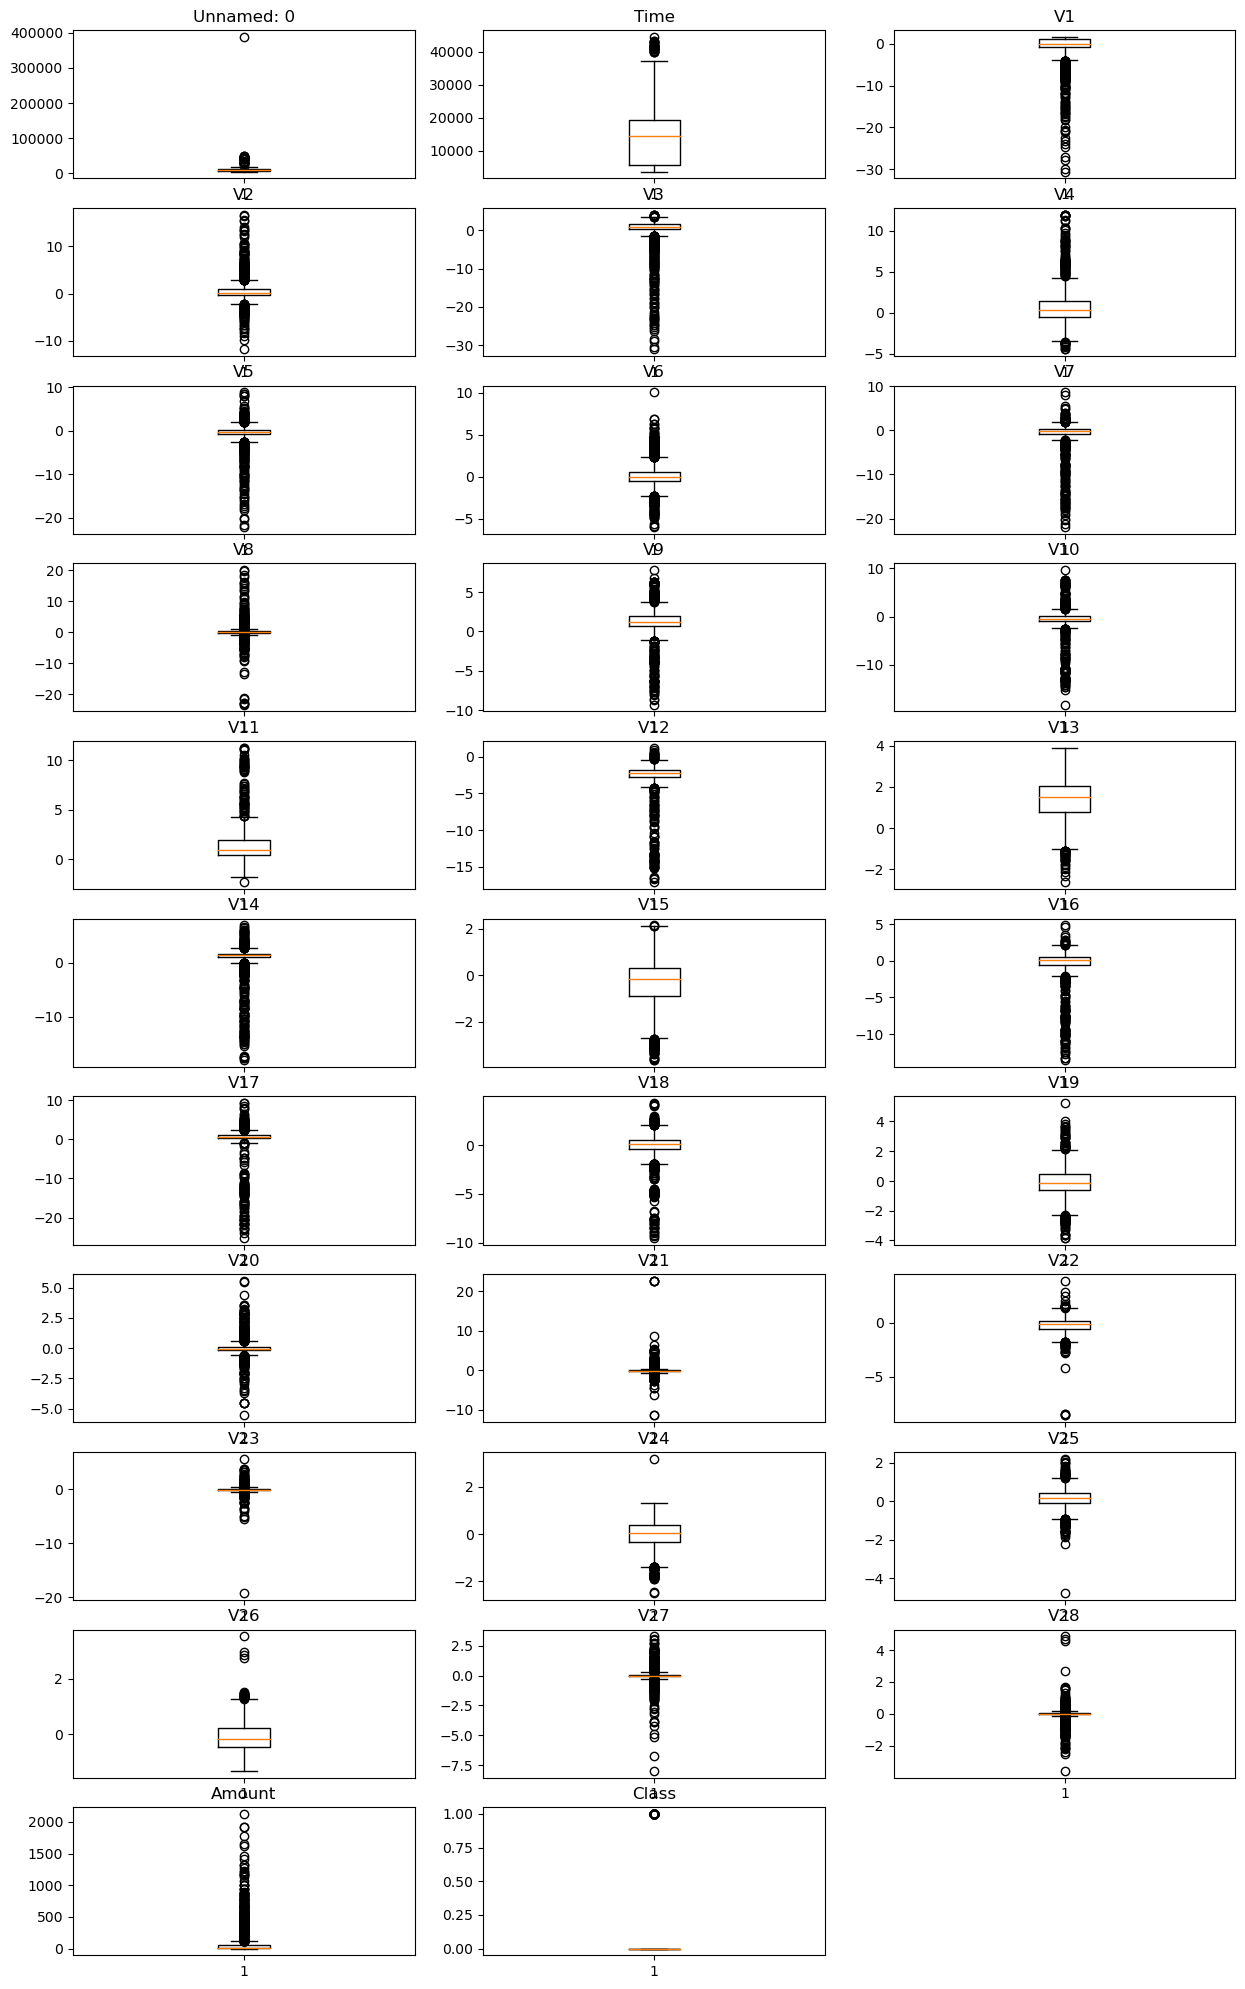

In [9]:
# Checking for the Outliers in the dataset
plt.figure(figsize = (15,25))
count = 1
for col in data:
    plt.subplot(11,3,count)
    plt.boxplot(data[col])
    plt.title(col)
    count += 1
plt.show()

In [10]:
#checking the class distribution
data['Class'].value_counts()

0    5003
1      96
Name: Class, dtype: int64

In [11]:
#dropping the coloumn
data=data.drop(["Unnamed: 0"],axis=1)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,3756,1.328287,-0.579219,0.622191,-0.477965,-1.062418,-0.570816,-0.834580,-0.022299,0.821266,...,-0.230903,-0.650906,0.185311,-0.057384,0.055986,-0.485516,-0.017464,0.011740,27.91,0
1,3756,1.380025,-0.719074,-0.927477,-1.607368,1.447385,3.278719,-1.155732,0.707490,0.358808,...,-0.271422,-0.904084,0.071516,0.920587,0.352977,-0.509559,-0.022016,0.017362,53.00,0
2,3756,1.245933,-0.940653,-1.005307,-1.550986,1.378930,3.303698,-1.063627,0.689475,0.350633,...,-0.229364,-0.940718,0.010338,0.924149,0.327491,-0.516961,-0.035130,0.029448,122.41,0
3,3756,-0.209595,-0.546688,1.352906,-1.261824,0.435325,0.571316,-1.447447,-0.499340,0.301036,...,0.748047,-0.513380,-1.081378,-0.659909,-0.115635,-0.534156,0.232919,0.259636,116.03,0
4,3756,1.455736,-0.593967,-0.883533,-1.639203,1.486036,3.264616,-1.207737,0.717662,0.363424,...,-0.295169,-0.883400,0.106058,0.918577,0.367366,-0.505379,-0.014611,0.010539,13.81,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5094,42988,-4.423508,1.648048,-6.934388,4.894601,-5.078131,0.010849,-3.409096,1.409291,-3.260672,...,0.698359,0.487478,1.228698,-0.535217,0.388278,-0.009466,2.300164,0.081231,648.00,1
5095,43028,-1.109646,0.811069,-1.138135,0.935265,-2.330248,-0.116106,-1.621986,0.458028,-0.912189,...,0.641594,0.841755,0.176728,0.081004,-0.258899,0.707654,0.418649,0.080756,204.27,1
5096,43300,1.303216,1.224334,-2.198091,1.267753,1.715625,-0.557679,0.676696,-0.165207,-0.372330,...,-0.273487,-0.638989,-0.353315,-1.650017,0.975470,-0.178116,0.055378,0.079611,1.00,1
5097,43302,1.103974,-0.016781,0.771843,1.213550,-0.541776,0.083116,-0.350386,0.293099,0.478712,...,-0.200222,-0.469612,0.109422,0.154738,0.310512,-0.538615,0.043073,0.011748,1.00,1


Class
0    98.117278
1     1.882722
Name: Class, dtype: float64


<AxesSubplot:ylabel='Class'>

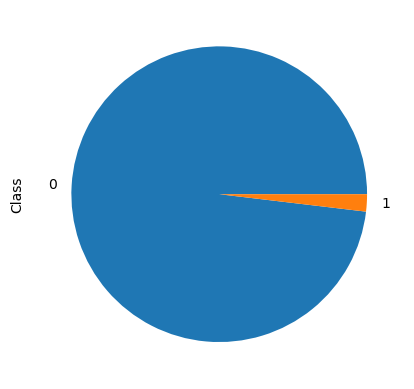

In [12]:
#checking the class distribution of the target variable in percentage and plotting piechart
print((data.groupby('Class')['Class'].count()/data['Class'].count())*100)
((data.groupby('Class')['Class'].count()/data['Class'].count())*100).plot.pie()

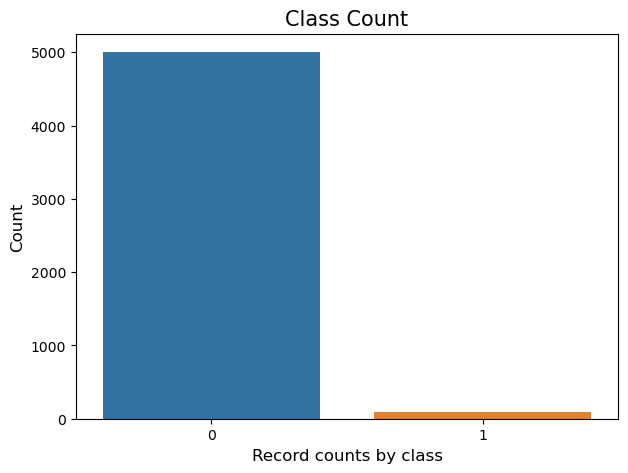

In [13]:
#creating a barplot for the number and percentagge of fraudulent vs non fraudulent
plt.figure(figsize=(7,5))
sns.countplot(data['Class'])
plt.title("Class Count",fontsize=15)
plt.xlabel("Record counts by class",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

Text(0.5, 1.0, 'Class Count')

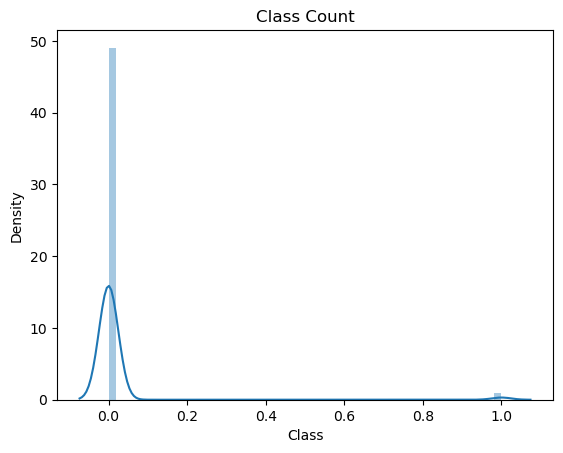

In [14]:
#DistPlot
sns.distplot(data['Class'])
plt.title ("Class Count")

In [15]:
#checking the correlation
corr=data.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.135334,0.120666,-0.232075,0.116259,-0.257304,-0.161547,-0.261947,0.145622,-0.073884,...,0.102486,0.103907,-0.042609,-0.012419,0.156757,-0.085589,0.082533,-0.040627,-0.017188,0.374400
V1,-0.135334,1.000000,-0.628836,0.631011,-0.326607,0.504742,0.211608,0.601901,-0.381939,0.360688,...,-0.180583,0.056103,0.026709,-0.021462,0.114508,-0.045064,-0.184051,0.074896,-0.138266,-0.522888
V2,0.120666,-0.628836,1.000000,-0.625690,0.386718,-0.472139,-0.208445,-0.469418,0.303499,-0.428249,...,0.165226,-0.165992,-0.057115,-0.021772,-0.079877,0.022491,0.270922,-0.078539,-0.297207,0.464921
V3,-0.232075,0.631011,-0.625690,1.000000,-0.425218,0.607096,0.177716,0.791837,-0.521827,0.534371,...,-0.100833,0.163253,0.072934,-0.009894,-0.135717,-0.013763,-0.287142,0.068416,-0.069026,-0.666677
V4,0.116259,-0.326607,0.386718,-0.425218,1.000000,-0.338077,-0.149663,-0.403365,0.230941,-0.534850,...,0.068647,0.038673,-0.030854,-0.039499,-0.092002,0.111617,0.142340,-0.058154,0.132980,0.469299
V5,-0.257304,0.504742,-0.472139,0.607096,-0.338077,1.000000,0.398033,0.627683,-0.431261,0.279476,...,-0.162477,-0.050038,0.077369,0.001915,-0.099879,-0.013815,-0.194314,0.038959,-0.225260,-0.510340
V6,-0.161547,0.211608,-0.208445,0.177716,-0.149663,0.398033,1.000000,0.189895,-0.146798,0.141471,...,0.019871,-0.046212,0.045856,0.078019,0.031355,0.015982,-0.120589,-0.058256,0.165830,-0.241975
V7,-0.261947,0.601901,-0.469418,0.791837,-0.403365,0.627683,0.189895,1.000000,-0.386698,0.472362,...,-0.217116,0.031395,0.124330,-0.017101,-0.114707,-0.042767,-0.290167,0.016992,0.103836,-0.653014
V8,0.145622,-0.381939,0.303499,-0.521827,0.230941,-0.431261,-0.146798,-0.386698,1.000000,-0.287108,...,-0.177075,0.098333,-0.142763,0.078203,0.072640,-0.023374,0.135292,0.028931,0.008597,0.350333
V9,-0.073884,0.360688,-0.428249,0.534371,-0.534850,0.279476,0.141471,0.472362,-0.287108,1.000000,...,-0.066159,0.056369,0.033078,-0.013588,0.143884,-0.106524,-0.121366,0.070622,-0.002231,-0.552064


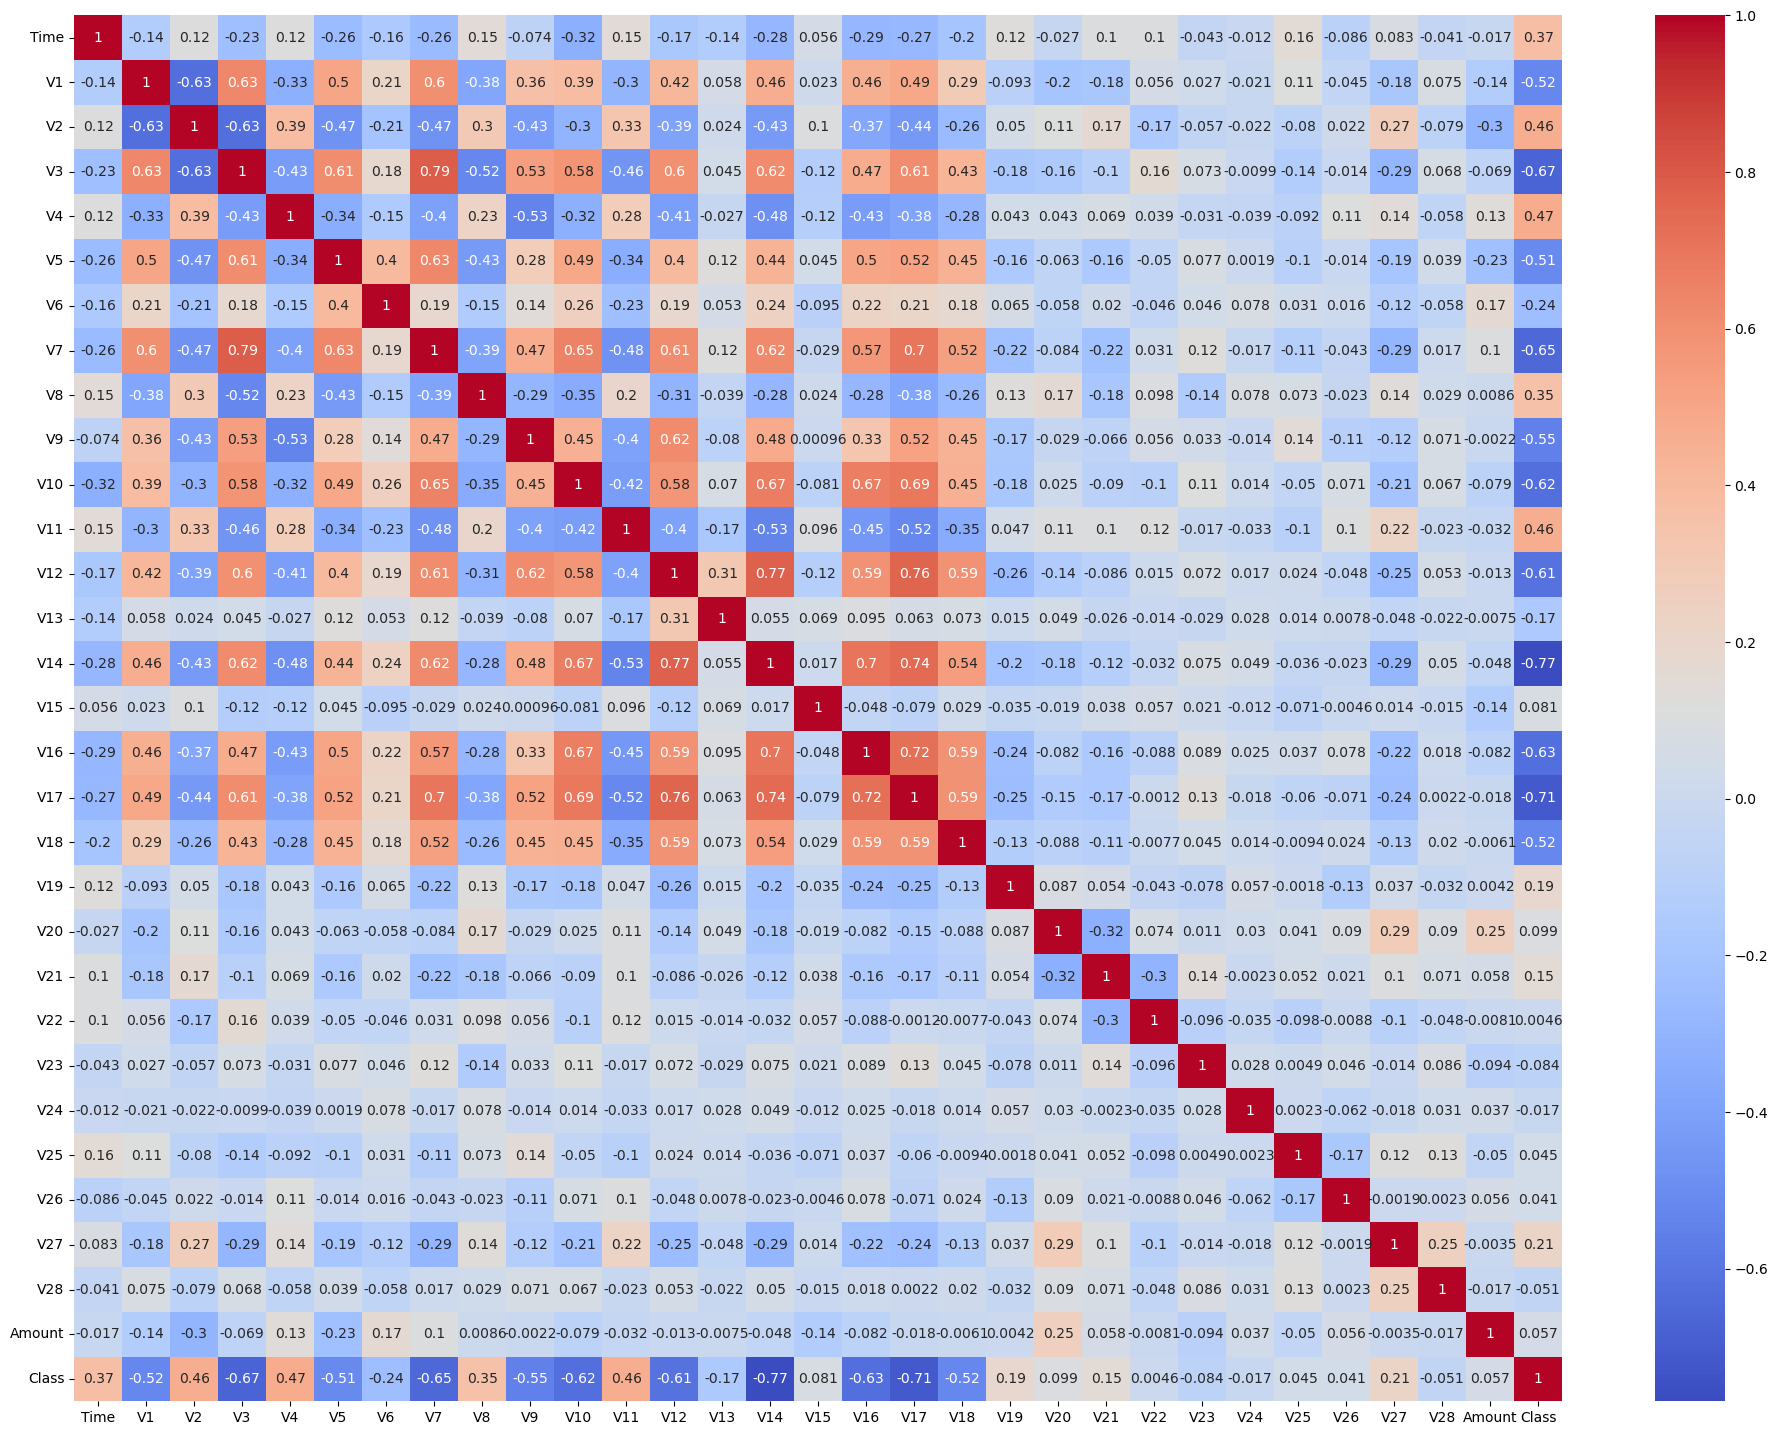

In [16]:
#checking the correlation in heatmap
plt.figure(figsize=(24,18))
sns.heatmap(corr,cmap="coolwarm",annot=True)
plt.show()

In [17]:
#Dropping the column
data.drop(['Time'],axis=1,inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.328287,-0.579219,0.622191,-0.477965,-1.062418,-0.570816,-0.834580,-0.022299,0.821266,0.248291,...,-0.230903,-0.650906,0.185311,-0.057384,0.055986,-0.485516,-0.017464,0.011740,27.91,0
1,1.380025,-0.719074,-0.927477,-1.607368,1.447385,3.278719,-1.155732,0.707490,0.358808,0.276875,...,-0.271422,-0.904084,0.071516,0.920587,0.352977,-0.509559,-0.022016,0.017362,53.00,0
2,1.245933,-0.940653,-1.005307,-1.550986,1.378930,3.303698,-1.063627,0.689475,0.350633,0.244546,...,-0.229364,-0.940718,0.010338,0.924149,0.327491,-0.516961,-0.035130,0.029448,122.41,0
3,-0.209595,-0.546688,1.352906,-1.261824,0.435325,0.571316,-1.447447,-0.499340,0.301036,-0.308828,...,0.748047,-0.513380,-1.081378,-0.659909,-0.115635,-0.534156,0.232919,0.259636,116.03,0
4,1.455736,-0.593967,-0.883533,-1.639203,1.486036,3.264616,-1.207737,0.717662,0.363424,0.295128,...,-0.295169,-0.883400,0.106058,0.918577,0.367366,-0.505379,-0.014611,0.010539,13.81,0


# Splitting the data 

In [18]:
#splitting for train and test 
x=data.drop(['Class'],axis=1)
y=data['Class']

In [19]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.328287,-0.579219,0.622191,-0.477965,-1.062418,-0.570816,-0.834580,-0.022299,0.821266,0.248291,...,-0.102332,-0.230903,-0.650906,0.185311,-0.057384,0.055986,-0.485516,-0.017464,0.011740,27.91
1,1.380025,-0.719074,-0.927477,-1.607368,1.447385,3.278719,-1.155732,0.707490,0.358808,0.276875,...,0.244534,-0.271422,-0.904084,0.071516,0.920587,0.352977,-0.509559,-0.022016,0.017362,53.00
2,1.245933,-0.940653,-1.005307,-1.550986,1.378930,3.303698,-1.063627,0.689475,0.350633,0.244546,...,0.385885,-0.229364,-0.940718,0.010338,0.924149,0.327491,-0.516961,-0.035130,0.029448,122.41
3,-0.209595,-0.546688,1.352906,-1.261824,0.435325,0.571316,-1.447447,-0.499340,0.301036,-0.308828,...,-0.138387,0.748047,-0.513380,-1.081378,-0.659909,-0.115635,-0.534156,0.232919,0.259636,116.03
4,1.455736,-0.593967,-0.883533,-1.639203,1.486036,3.264616,-1.207737,0.717662,0.363424,0.295128,...,0.164725,-0.295169,-0.883400,0.106058,0.918577,0.367366,-0.505379,-0.014611,0.010539,13.81


In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3569, 29)
(1530, 29)
(3569,)
(1530,)


In [23]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

96
68
28


In [24]:
#accumulating all coloumn names under one variable
cols = list(x.columns.values)


# Model Building

## 1.logistic Regression

In [25]:
#importing logistic libraries and fitting the model
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [26]:
# Predictions on training and testing data
y_pred_train1 = log_model.predict(x_train)
y_pred_test1 = log_model.predict(x_test)

In [27]:
#checking the accuracy of the model
accu_train1=accuracy_score(y_train,y_pred_train1)
print(accu_train1)
accu_test1=accuracy_score(y_test,y_pred_test1)
print(accu_test1)

0.9988792378817596
0.9986928104575163


In [28]:
print("training accuracy:",round(accu_train1*100,2),"%")
print("testing accuracy:",round(accu_test1*100,2),"%")

training accuracy: 99.89 %
testing accuracy: 99.87 %


In [29]:
#confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test1).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,26,2
Not Fraud,0,1502


<AxesSubplot:>

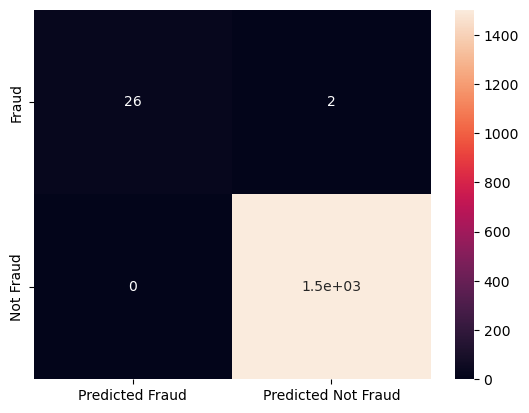

In [30]:
sns.heatmap(conf_matrix, annot=True)

In [31]:
#checking precision,recall,f1-score
print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1502
           1       1.00      0.93      0.96        28

    accuracy                           1.00      1530
   macro avg       1.00      0.96      0.98      1530
weighted avg       1.00      1.00      1.00      1530



## 2.Random Forest

In [32]:
#importing Random Forest libraries and fitting the model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [33]:
# Predictions on training and testing data
y_pred_train2 = rf_model.predict(x_train)
y_pred_test2 = rf_model.predict(x_test)

In [34]:
#checking the accuracy of the model
accu_train2=accuracy_score(y_train,y_pred_train2)
print(accu_train2)
accu_test2=accuracy_score(y_test,y_pred_test2)
print(accu_test2)

1.0
0.996078431372549


In [35]:
print("training accuracy:",round(accu_train2*100,2),"%")
print("testing accuracy:",round(accu_test2*100,2),"%")

training accuracy: 100.0 %
testing accuracy: 99.61 %


In [36]:
#confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test2).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,22,6
Not Fraud,0,1502


<AxesSubplot:>

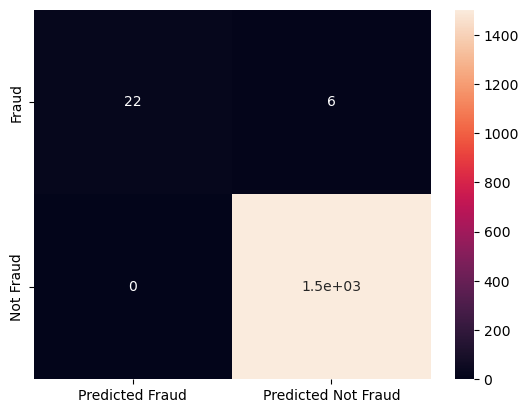

In [37]:
sns.heatmap(conf_matrix, annot=True)

In [38]:
#checking precision,recall,f1-score
print(classification_report(y_test,y_pred_test2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1502
           1       1.00      0.79      0.88        28

    accuracy                           1.00      1530
   macro avg       1.00      0.89      0.94      1530
weighted avg       1.00      1.00      1.00      1530



## 3. SVM

In [39]:
#importing SVM libraries and fitting the model
from sklearn.svm import SVC
svc_model=SVC(kernel='linear',random_state=42,probability=True)
svc_model.fit(x_train,y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [40]:
# Predictions on training and testing data
y_pred_train3 = svc_model.predict(x_train)
y_pred_test3 = svc_model.predict(x_test)

In [41]:
##checking the accuracy of the model
accu_train3=accuracy_score(y_train,y_pred_train3)
print(accu_train3)
accu_test3=accuracy_score(y_test,y_pred_test3)
print(accu_test3)

0.9991594284113197
0.9986928104575163


In [42]:
print("training accuracy:",round(accu_train3*100,2),"%")
print("testing accuracy:",round(accu_test3*100,2),"%")

training accuracy: 99.92 %
testing accuracy: 99.87 %


In [43]:
#confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test3).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,26,2
Not Fraud,0,1502


<AxesSubplot:>

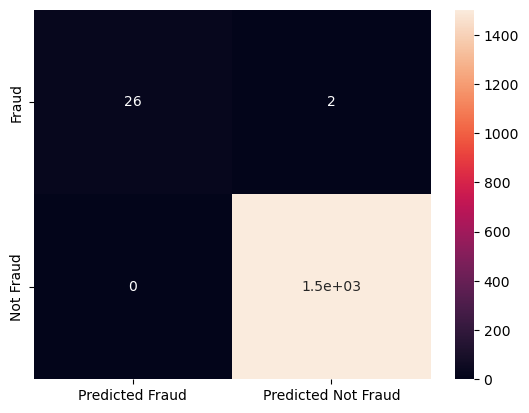

In [44]:
sns.heatmap(conf_matrix, annot=True)

In [45]:
#checking precision,recall,f1-score
print(classification_report(y_test,y_pred_test3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1502
           1       1.00      0.93      0.96        28

    accuracy                           1.00      1530
   macro avg       1.00      0.96      0.98      1530
weighted avg       1.00      1.00      1.00      1530



## 4. KNN 

In [46]:
#importing KNN libraries and fitting the model
from sklearn import neighbors
import sklearn.model_selection as ms

In [47]:
K=list(range(1,21,2))
K

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [48]:

n_grid=[{"n_neighbors":K}]#to find the number of neighbours
model=neighbors.KNeighborsClassifier()
gd=ms.GridSearchCV(estimator=model,param_grid=n_grid,cv=ms.KFold(n_splits=10))
gd.fit(x_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}])

In [49]:
best_K=gd.best_params_["n_neighbors"]
print("best value o k :",best_K)

best value o k : 1


In [50]:
knn_model=neighbors.KNeighborsClassifier(n_neighbors=best_K)
knn_model.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [51]:
# Predictions on training and testing data
y_pred_train4 = knn_model.predict(x_train)
y_pred_test4 = knn_model.predict(x_test)

In [52]:
accu_train4=accuracy_score(y_train,y_pred_train4)
print(accu_train4)
accu_test4=accuracy_score(y_test,y_pred_test4)
print(accu_test4)

1.0
0.9941176470588236


In [53]:
print("training accuracy:",round(accu_train4*100,2),"%")
print("testing accuracy:",round(accu_test4*100,2),"%")

training accuracy: 100.0 %
testing accuracy: 99.41 %


In [54]:
#confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test4).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,21,7
Not Fraud,2,1500


<AxesSubplot:>

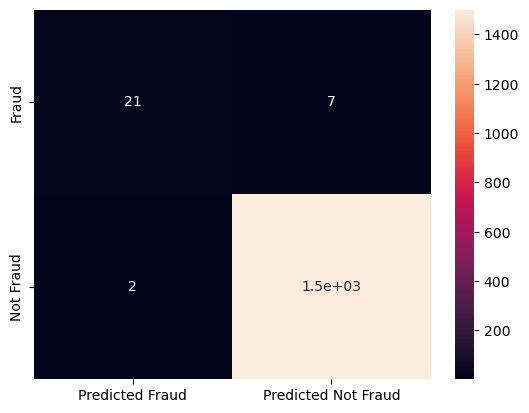

In [55]:
sns.heatmap(conf_matrix, annot=True)

In [56]:
#checking precision,recall,f1-score
print(classification_report(y_test,y_pred_test4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1502
           1       0.91      0.75      0.82        28

    accuracy                           0.99      1530
   macro avg       0.95      0.87      0.91      1530
weighted avg       0.99      0.99      0.99      1530



## 5. Decision Tree

In [57]:
#importing Decision Tree libraries and fitting the model
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
# Predictions on training and testing data
y_pred_train5 = dt_model.predict(x_train)
y_pred_test5 = dt_model.predict(x_test)

In [59]:
#checking the accuracy of the model
accu_train5=accuracy_score(y_train,y_pred_train5)
print(accu_train5)
accu_test5=accuracy_score(y_test,y_pred_test5)
print(accu_test5)

1.0
0.9941176470588236


In [60]:
print("training accuracy:",round(accu_train5*100,2),"%")
print("testing accuracy:",round(accu_test5*100,2),"%")

training accuracy: 100.0 %
testing accuracy: 99.41 %


In [61]:
#confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test5).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,21,7
Not Fraud,2,1500


<AxesSubplot:>

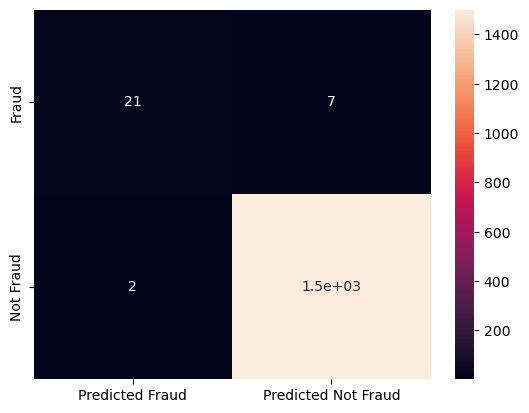

In [62]:
sns.heatmap(conf_matrix, annot=True)

In [63]:
#checking precision,recall,f1-score
print(classification_report(y_test,y_pred_test5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1502
           1       0.91      0.75      0.82        28

    accuracy                           0.99      1530
   macro avg       0.95      0.87      0.91      1530
weighted avg       0.99      0.99      0.99      1530



## 6. ADA_BOOST_CLASSIFIER

In [64]:
#importing ADA_BOOST libraries and fitting the model
from sklearn.ensemble import AdaBoostClassifier
ada_model=AdaBoostClassifier()
ada_model.fit(x_train,y_train)

AdaBoostClassifier()

In [65]:
# Predictions on training and testing data
y_pred_train6 = ada_model.predict(x_train)
y_pred_test6 = ada_model.predict(x_test)

In [66]:
#checking the accuracy of the model
accu_train6=accuracy_score(y_train,y_pred_train6)
print(accu_train6)
accu_test6=accuracy_score(y_test,y_pred_test6)
print(accu_test6)

1.0
0.9947712418300654


In [67]:
print("training accuracy:",round(accu_train6*100,2),"%")
print("testing accuracy:",round(accu_test6*100,2),"%")

training accuracy: 100.0 %
testing accuracy: 99.48 %


In [68]:
#confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test6).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,20,8
Not Fraud,0,1502


<AxesSubplot:>

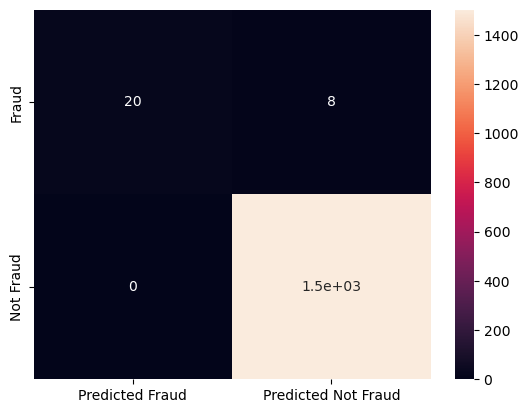

In [69]:
sns.heatmap(conf_matrix, annot=True)

In [70]:
#checking precision,recall,f1-score
print(classification_report(y_test,y_pred_test6))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1502
           1       1.00      0.71      0.83        28

    accuracy                           0.99      1530
   macro avg       1.00      0.86      0.92      1530
weighted avg       0.99      0.99      0.99      1530



## 7. GaussianNB

In [71]:
#importing GaussianNB libraries and fitting the model
from sklearn.naive_bayes import GaussianNB
gauss_model=GaussianNB()

In [72]:
gauss_model.fit(x_train,y_train)

GaussianNB()

In [73]:
# Predictions on training and testing data
y_pred_train7 = gauss_model.predict(x_train)
y_pred_test7 = gauss_model.predict(x_test)

In [74]:
#checking the accuracy of the model
accu_train7=accuracy_score(y_train,y_pred_train7)
print(accu_train7)
accu_test7=accuracy_score(y_test,y_pred_test7)
print(accu_test7)

0.9773045671056318
0.9790849673202614


In [75]:
print("training accuracy:",round(accu_train7*100,2),"%")
print("testing accuracy:",round(accu_test7*100,2),"%")

training accuracy: 97.73 %
testing accuracy: 97.91 %


In [76]:
#confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test7).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,22,6
Not Fraud,26,1476


<AxesSubplot:>

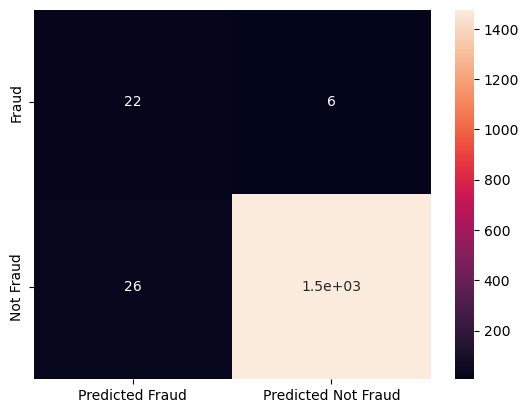

In [77]:
sns.heatmap(conf_matrix, annot=True)

In [78]:
#checking precision,recall,f1-score
print(classification_report(y_test,y_pred_test7))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1502
           1       0.46      0.79      0.58        28

    accuracy                           0.98      1530
   macro avg       0.73      0.88      0.78      1530
weighted avg       0.99      0.98      0.98      1530



## Performance Analysis of each model

In [79]:
New_model=[log_model,rf_model,svc_model,knn_model,dt_model,ada_model,gauss_model]
Testing_Acc=[]
Training_Acc=[]
for i in New_model:
  i.fit(x_train,y_train)
  Testing_Acc.append(round(accuracy_score(y_test,i.predict(x_test))*100,2))
  Training_Acc.append(round(accuracy_score(y_train,i.predict(x_train))*100,2))
print(Testing_Acc)
print(Training_Acc)  

[99.87, 99.67, 99.87, 99.41, 99.48, 99.48, 97.91]
[99.89, 100.0, 99.92, 100.0, 100.0, 100.0, 97.73]


In [80]:
DATA_FRAME=pd.DataFrame({"MODEL_NAME":['Logistic Regression ','RandomForest','SVM','KNN','Decision Tree Classifier','AdaBoostClassifier','GaussianNB'],"training accuracy":Training_Acc,"testing accuracy":Testing_Acc})
DATA_FRAME

,MODEL_NAME,training accuracy,testing accuracy
0,Logistic Regression,99.89,99.87
1,RandomForest,100.00,99.67
2,SVM,99.92,99.87
3,KNN,100.00,99.41
4,Decision Tree Classifier,100.00,99.48
5,AdaBoostClassifier,100.00,99.48
6,GaussianNB,97.73,97.91


# Graphical Representation of Each Model Performance using its train & test data

<AxesSubplot:xlabel='[Logistic Regression , RandomForest, SVM, KNN, Decision Tree Classifier, AdaBoostClassifier, GaussianNB]'>

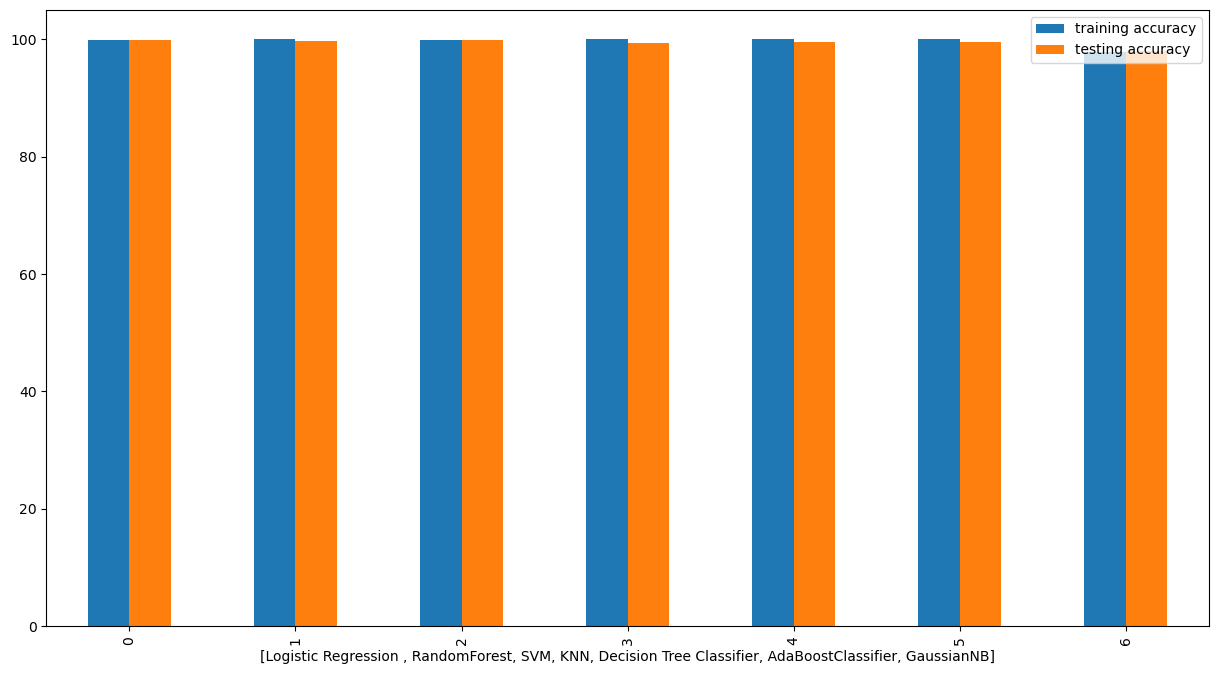

In [81]:
DATA_FRAME.plot(kind='bar',figsize=(15,8),xlabel=DATA_FRAME['MODEL_NAME'])

# Prediction using Existing Data

In [82]:
d_data=[[-3.240186587,2.97812179,-4.162313937,3.869124379,-3.645256455,-0.126270561,-4.744729737,-0.065331044,-2.168366095,-4.758304075,3.471097846,-6.533106769,-0.98346867,-6.073989003,1.125406709,-7.718042405,-9.855927437,-5.193907893,2.042697688,-0.224043463,2.601441029,0.231910116,-0.036489849,0.042639645,-0.438330346,-0.12582108,0.421299802,0.003145876,172.32
]]
p=ada_model.predict(d_data)
print(p)
if p==0:
    print("Credit Card Fraud Detection has not been detected")
else:
    print("Credit Crad Fraud Detection has been detected")

[1]
Credit Crad Fraud Detection has been detected


In [83]:
d_data=[[1.328286973,-0.579219059,0.622190545,-0.477965418,-1.062418354,-0.570816358,-0.83457999,-0.022299183,0.821265832,0.248291354,0.63104363,-4.078436048,-0.294213807,1.731927621,0.562439079,1.015576868,1.348802151,-1.494219178,0.054999048,-0.102332115,-0.230902625,-0.650906248,0.185310855,-0.057384073,0.05598644,-0.48551575,-0.017463823,0.011740384,27.91
]]
p=ada_model.predict(d_data)
print(p)
if p==0:
    print("Credit Card Fraud Detection has not been detected")
else:
    print("Credit Crad Fraud Detection has been detected")

[0]
Credit Card Fraud Detection has not been detected


#  DL APPROACH

# ANN-MLP

In [84]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.


###  Importing Libraries for Keras

In [86]:
from tensorflow.keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import plot_model


### Model Creation

In [88]:
#define model
model = Sequential([
    #define input layer
    Dense(units=128,input_dim = 29,activation='relu'),
    #define hidden layer
    Dense(units=64,activation='relu'),
    Dropout(0.45),
    Dense(32,activation='relu'),
    #define output layer
    Dense(1,activation='sigmoid')
])

In [89]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3840      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,209
Trainable params: 14,209
Non-trainable params: 0
_________________________________________________________________


# Configuration Step

In [90]:
#define loss and optimizer
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Data Training

In [91]:
model.fit(x_train,y_train,batch_size=128,epochs=25)

Epoch 1/25
28/28 [==============================] - 1s 2ms/step - loss: 0.5837 - accuracy: 0.9594
Epoch 2/25
28/28 [==============================] - 0s 2ms/step - loss: 0.2301 - accuracy: 0.9863
Epoch 3/25
28/28 [==============================] - 0s 2ms/step - loss: 0.1068 - accuracy: 0.9916
Epoch 4/25
28/28 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 0.9888
Epoch 5/25
28/28 [==============================] - 0s 2ms/step - loss: 0.0830 - accuracy: 0.9910
Epoch 6/25
28/28 [==============================] - 0s 1ms/step - loss: 0.0742 - accuracy: 0.9924
Epoch 7/25
28/28 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9908
Epoch 8/25
28/28 [==============================] - 0s 1ms/step - loss: 0.0358 - accuracy: 0.9933
Epoch 9/25
28/28 [==============================] - 0s 1ms/step - loss: 0.0327 - accuracy: 0.9938
Epoch 10/25
28/28 [==============================] - 0s 1ms/step - loss: 0.0298 - accuracy: 0.9944
Epoch 11/25
28/28 [

### Evaluation

In [92]:
model.evaluate(x_test,y_test)

48/48 [==============================] - 0s 1ms/step - loss: 0.0109 - accuracy: 0.9974


[0.010897131636738777, 0.9973856210708618]

## Prediction Using Test data

In [93]:
pred = model.predict(x_test)

48/48 [==============================] - 0s 667us/step


In [94]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Accuracy score is: ',round(accuracy_score(y_test,pred.round()),4))
print("============================================")
print('Classification report: \n',classification_report(y_test,pred.round()))
print("============================================")

print('Confusion Matrix: \n',confusion_matrix(y_test,pred.round()))


Accuracy score is:  0.9974
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1502
           1       1.00      0.86      0.92        28

    accuracy                           1.00      1530
   macro avg       1.00      0.93      0.96      1530
weighted avg       1.00      1.00      1.00      1530

Confusion Matrix: 
 [[1502    0]
 [   4   24]]


# Prediction Using Existing data

In [95]:
y_pred = model.predict([[-3.240186587,2.97812179,-4.162313937,3.869124379,-3.645256455,-0.126270561,-4.744729737,-0.065331044,-2.168366095,-4.758304075,3.471097846,-6.533106769,-0.98346867,-6.073989003,1.125406709,-7.718042405,-9.855927437,-5.193907893,2.042697688,-0.224043463,2.601441029,0.231910116,-0.036489849,0.042639645,-0.438330346,-0.12582108,0.421299802,0.003145876,172.32
]])
print(y_pred)
if p >= 0.5:
    print("Credit Card Fraud Detection has not been detected")
else:
    print("Credit Crad Fraud Detection has been detected")


1/1 [==============================] - 0s 63ms/step
[[0.8693651]]
Credit Crad Fraud Detection has been detected
